# Numerical Methods Project 1: Root Finding 

# S1: Dificulty with Computation

## Q1: Show mathematically that Horner's rule is a valid algorithm for polynomial evaluation.

See Attached Document "Root Finding Figures" Figure 1

## Q2: Code for Honer's Rule 

In [55]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def my_func(x):                   
    return x**2 - 4                    

                  
def my_horner(a, x):                  # defines a function of 2 variables 'a' and 'x'. a is the array of coefficients of the polynomial.                   
    N = len(a) - 1                    # N = highest order of the polynomial = (number of coefficients) -1
    p = a[-1]                         # initailizes p at the coefficient of the highest degree term
    for k in range(N - 1, -1, -1):    # loop with k as the coefficients starting at the second highest degree term, stepping by -1, ending at the lowest degree term
        p = p * x + a[k]              # p = x * p + a_k
    return p

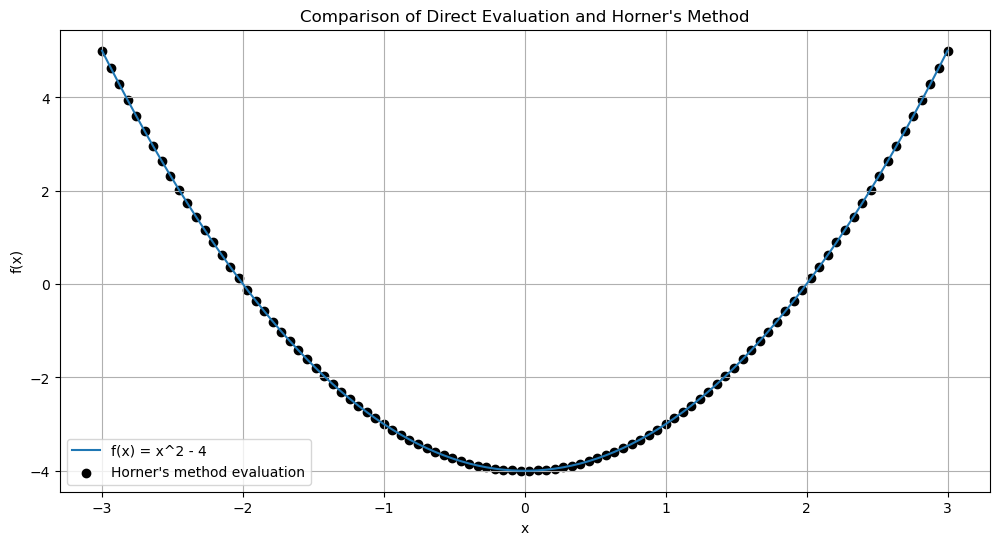

In [22]:
x = np.linspace(-3, 3)            
y = my_func(x)  

x_horn = np.linspace(-3, 3, 100)                               # x values 
coeffs   = [-4,0,1]                                            # Coefficients of x^2 - 4 in acending order
y_horn = np.array([my_horner(coeffs, x) for x in x_horn])      # Calculate y values

plt.figure(figsize=(12, 6))
plt.plot(x, y, label = 'f(x) = x^2 - 4')
plt.scatter(x_horn, y_horn, color = 'black', label = "Horner's method evaluation") # Create the plot
plt.xlabel('x')
plt.ylabel('f(x)') 
plt.legend()
plt.title("Comparison of Direct Evaluation and Horner's Method")
plt.grid(True)
plt.show()     

Observation Comments: Horners rule is a very good approximation of the funtion. 

## Question 3: Horner's Rule

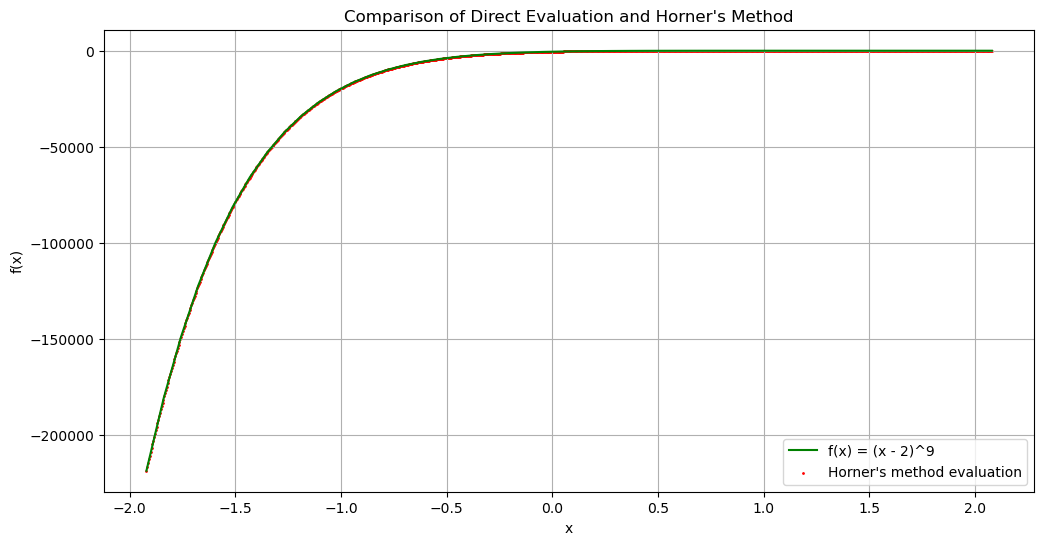

In [45]:
def g(x):                         
    return (x - 2)**9             

x = np.linspace(-1.92, 2.08)       
y = g(x)                           


x_horn2 = np.linspace(-1.92, 2.08, 1000)                                 # x values 
coefs   = [-512, 2304, -4608, 5376, -4032, 2016, -672, 144, -18, 1]      # Coefficients of x^2 - 4 in acending order
y_horn2 = np.array([my_horner(coefs, x) for x in x_horn2])               # Calculate y values

               
plt.figure(figsize=(12, 6))
plt.plot(x, y, color = 'green', label = 'f(x) = (x - 2)^9')
plt.scatter(x_horn2, y_horn2, color = 'red', label = "Horner's method evaluation", s = 1) 
plt.xlabel('x')
plt.ylabel('f(x)') 
plt.legend()
plt.title("Comparison of Direct Evaluation and Horner's Method")
plt.grid(True)
plt.show()                   

Horners Method evaluated at 1000 points is almost identical to the plot of the function itself. 

# S2: Root finding with bisection

## Q1: Bisection Code

In [76]:
def my_bisection(f, a, b, tol):  
    if f(b) * f(a) < 0:             # if f(b) * f(a) < 0, that means they have opposite sign and are on either side of the root
        i = 0                       #Used as a counter for the iterates
        while abs(a-b) > tol:       #While loop loops as long as interval is within tolerance
            m = (a + b) / 2         #Creates the midpoint of the interval
            
            if   f(m) == 0:         
                print("You Found a Root at %0.4f" %m)
                break               #If you found the midpoint on the first slice the loop stops
            
            elif f(a) * f(m) < 0:   #If f(a) and f(m) have opposite signs, 
                b = m               #then the root is between them and the midpoint shouild be come the new b 
            else:                   
                a = m               #Otherwise the root is between the midpont and b, so m should become the new a 
            i += 1                  #i value increases by 1 after each loop
        return m, a, b, i
    else:
        print(" invalid inputs ")

In [78]:
def test_func(x):
    return x**2 - 4    #defines a function using lambda so that I can call it within another function

a_1 = 3      # arbitrary point
b_1 = 1.1    # arbitrary point
tol_1 = 0.001

root, a, b, iter = my_bisection(test_func, a_1, b_1, tol_1)

print("After %d iterates, the root is approximately %0.10f" %(iter, root))

After 11 iterates, the root is approximately 2.0008300781


## Q2: Theoretical Bisection Error

See Attached Document "Root Finding Figures" Figure 2

## Q3: Bisection With Horner's Rule

After 11 iterates, the root is approximately 2.0002734375


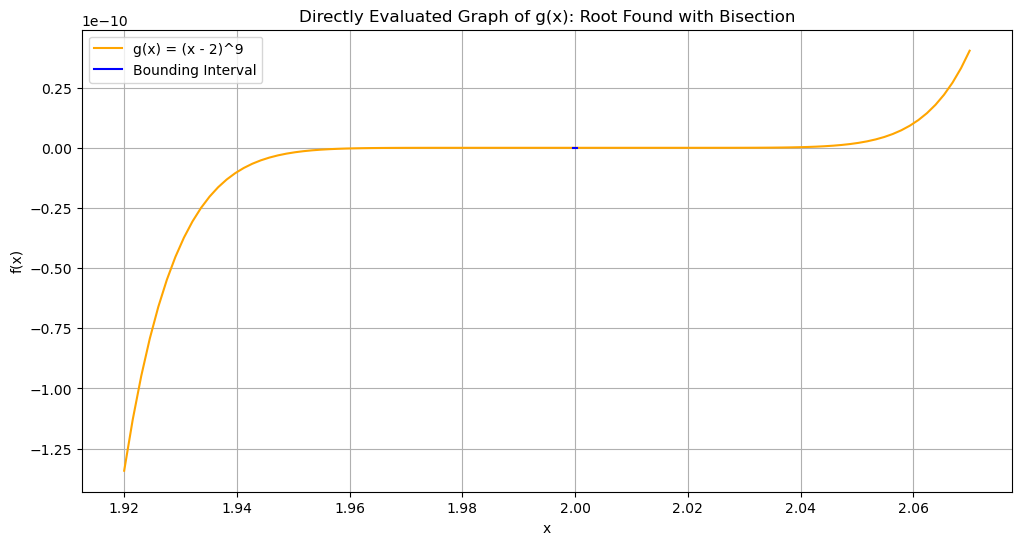

In [100]:
a_2 = 1.92
b_2 = 2.07
tol_2 = 0.001

g_ = lambda x: (x - 2)**9
x_ = np.linspace(a_2, b_2, 100)           # Generate x values for graph of g_(x)
y_ = g_(x_)   

root, lower, upper, i = my_bisection(g_, a_2, b_2, tol_2) 
print("After %d iterates, the root is approximately %0.10f" %(iter, root))

def bound_int(x):
    return x * 0
ab_ = np.linspace(lower, upper)  
ab_y = bound_int(ab_)

plt.figure(figsize=(12, 6))
plt.plot(x_, y_, color = 'orange', label = 'g(x) = (x - 2)^9')
plt.plot(ab_, ab_y, color = 'blue', label = 'Bounding Interval')
plt.xlabel('x')
plt.ylabel('f(x)') 
plt.legend()
plt.title("Directly Evaluated Graph of g(x): Root Found with Bisection")
plt.grid(True)
plt.show()       

The error is within the theoretical bound.  

The Root is Approximately 2.0131640625


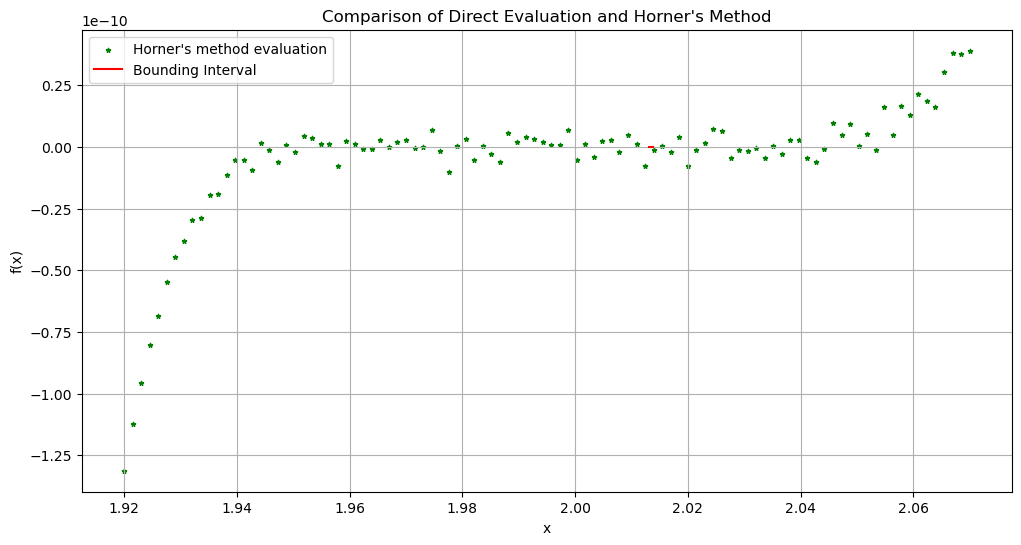

In [117]:
coefficients = [-512, 2304, -4608, 5376, -4032, 2016, -672, 144, -18, 1]   # Coefficients of x^2 - 4 in acending order, and placed above the lambda to lock them in

lambda_horner = lambda x: my_horner(coefficients, x)                       # locks the coefficients of my_horner so I can call lambda_horner as a function of one variable

a_3 = 1.92
b_3 = 2.07
tol_3 = 0.001

x_horn3 = np.linspace(a_3, b_3, 100)                                   #x values  
y_horn3 = np.array([my_horner(coefficients, x) for x in x_horn3])      #y values

root, lower, upper, i = my_bisection(lambda_horner, a_3, b_3, tol_3) 
print("The Root is Approximately %0.10f" %root)

def bound_int(x):                #function for the bouding interval
    return x * 0                 #its a horizontal line on the x axis
ab_ = np.linspace(lower, upper)  #defining x values of bound int
ab_y = bound_int(ab_)            #calling bound_int at ab_ values

plt.figure(figsize=(12, 6))
plt.scatter(x_horn3, y_horn3, color = 'green', marker = '*', label = "Horner's method evaluation", s = 10) # Create the plot
plt.plot(ab_, ab_y, color = 'red', label = 'Bounding Interval')
plt.xlabel('x')
plt.ylabel('f(x)') 
plt.legend()
plt.title("Comparison of Direct Evaluation and Horner's Method")
plt.grid(True)
plt.show()                   

The error is not within the theoretical bound.

# S3: Root Finding with Newton

### Q1: Newton's Method

In [136]:
def my_newton(my_func, ddmy_func, x0, tol, max_iter):
    i = 0
    check = True                                       #condition that will be used to start the loop
    errors = []                                        #empty array to store error values after each iteration
    x_values = []
    while check:                                       #Need to use 'check' to enter the loop rather than 'while tol < |x1 - x0|' because x1 isnt defined initially                                 
        x1 = x0 - (my_func(x0) / ddmy_func(x0))        #Newton's Method
        error = abs(x0 - x1)                           #Calculate the error at each step
        errors.append(error) 
        x_values.append(i)                             #Store the error
        check = abs(x0 - x1) > tol                     #Checks if it is within tolerance or not, if Check = false, loop ends
        x0 = x1
        i+=1
        if i >= max_iter:
            return x1, errors, x_values                #stops the loop at max iterations
    return x1, errors, x_values

### Q2: Testing Newton's Method

Newtons estimated root is: 1.3862943611198908


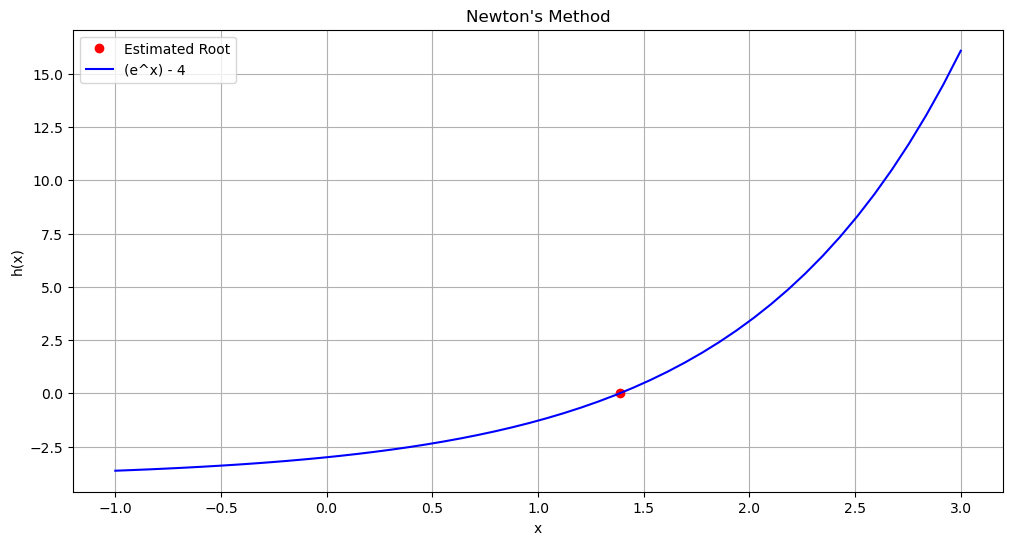

In [138]:
h1 = lambda x: np.e**x - 4
h_prime = lambda x: np.e**x
init_x = 20
tol_1 = 1e-10
max_ITER = 30

x1 = np.linspace(-1,3)
y1 = h1(x1)

root1, err1, x_vals1 = my_newton(h1, h_prime, init_x, tol_1, max_ITER)
yr1 = 0
print('Newtons estimated root is:', root1)

plt.figure(figsize=(12, 6))
plt.plot(root1, yr1, 'ro', label = 'Estimated Root')
plt.plot(x1, y1, color = 'blue', label = '(e^x) - 4')
plt.xlabel('x')
plt.ylabel('h(x)') 
plt.legend()
plt.title("Newton's Method")
plt.grid(True)
plt.show()   

### Q3: Plotting Errors of Newton's Method

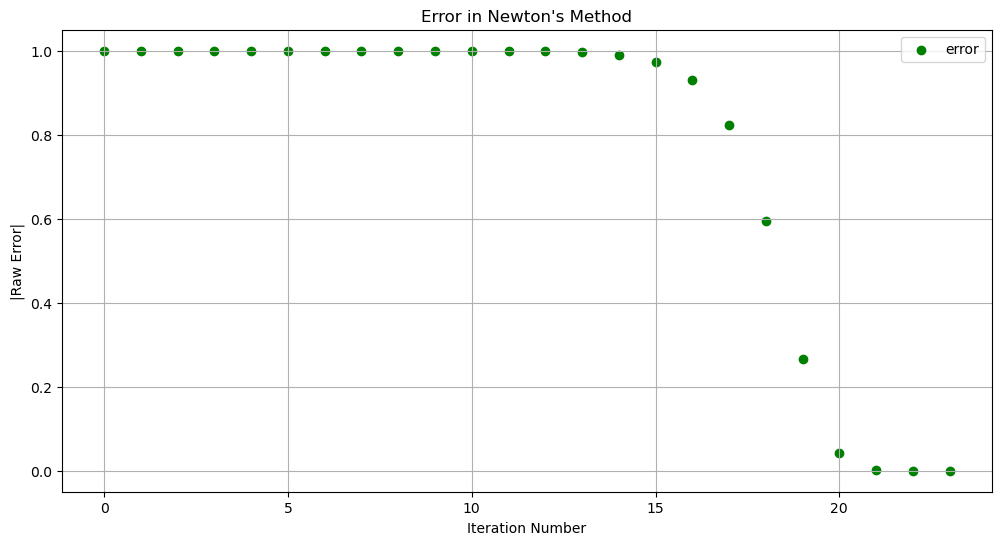

In [147]:
plt.figure(figsize=(12, 6))
plt.scatter(x_vals1, err1, color='green', marker='o', label = 'error')
plt.xlabel('Iteration Number')
plt.ylabel('|Raw Error|') 
plt.legend()
plt.title("Error in Newton's Method")
plt.grid(True)
plt.show()   

# S4: Root Finding with Secant

### Q1: Defining The Secant Method

In [153]:
def my_secant(f, x0, x1, tol, max_iter):
    i = 0
    errors = []                                        
    x_values = []
    
    while abs(x1 - x0) > tol:
        x_temp = x1 - (f(x1) * (x1 - x0)) / (f(x1) - f(x0))   #Secant method formula
        error = abs(x0 - x1)                                  #Calculate the error at each step
        errors.append(error)                                  #appends error values to the empty errors array
        x_values.append(i)                                    #used to collect my x values
        x0, x1 = x1, x_temp                                   #Update the guesses
        i+=1
        if i >= max_iter:
            return x1, errors, x_values                       #stops the loop if max iterations reached
    return x1, errors, x_values

### Q2: Testing the Secant Method

Secants estimated root is: 1.3862943611198908


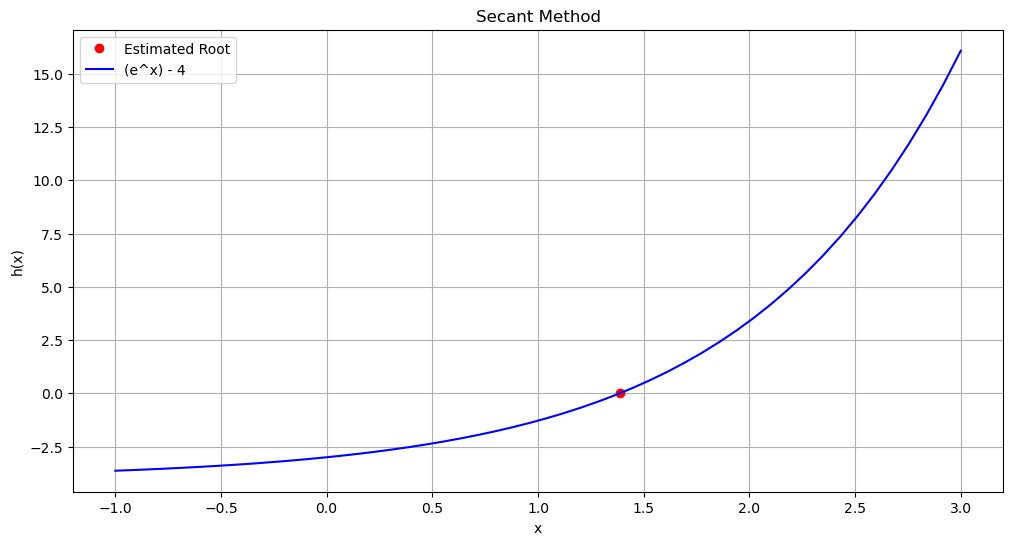

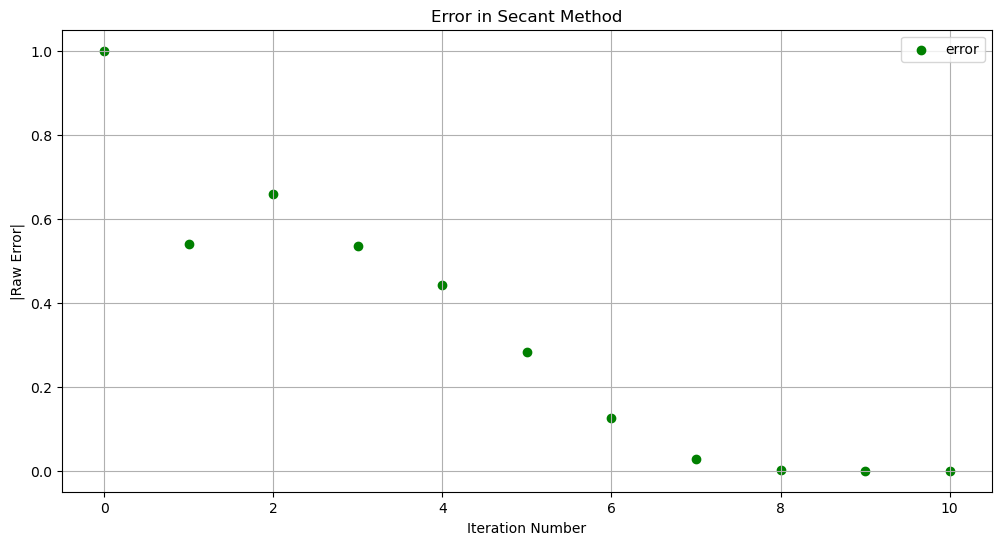

In [169]:
h2 = lambda x: np.e**x - 4
x_0 = 5
x_1 = 4
tol_2 = 1e-10
max_Iter = 100

x2 = np.linspace(-1,3)
y2 = h2(x2)

root2, err2, x_vals2 = my_secant(h2, x_0, x_1, tol_2, max_Iter)
yr2 = 0
print("Secants estimated root is:", root2)

plt.figure(figsize=(12, 6))
plt.plot(root2, yr2, 'ro', label = 'Estimated Root')
plt.plot(x2, y2, color = 'blue', label = '(e^x) - 4')
plt.xlabel('x')
plt.ylabel('h(x)') 
plt.legend()
plt.title("Secant Method")
plt.grid(True)
plt.show()   

plt.figure(figsize=(12, 6))
plt.scatter(x_vals2, err2, color='green', marker='o', label = 'error')
plt.xlabel('Iteration Number')
plt.ylabel('|Raw Error|') 
plt.legend()
plt.title("Error in Secant Method")
plt.grid(True)
plt.show()  

### Q3: Comparing Newton and Secant Method

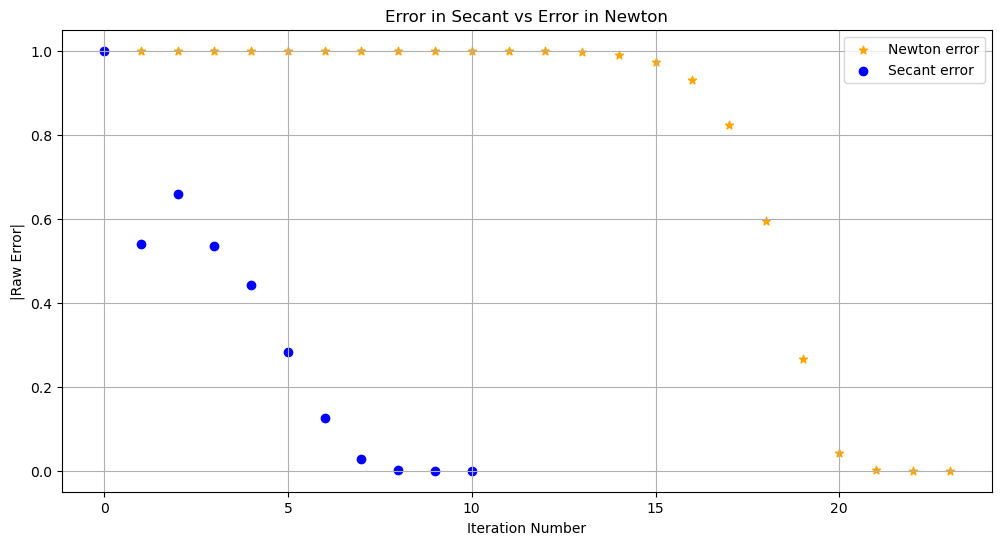

In [171]:
plt.figure(figsize=(12, 6))
plt.scatter(x_vals1, err1, color='orange', marker='*', label = 'Newton error')
plt.scatter(x_vals2, err2, color='blue', marker='o', label = 'Secant error')
plt.xlabel('Iteration Number')
plt.ylabel('|Raw Error|') 
plt.legend()
plt.title("Error in Secant vs Error in Newton")
plt.grid(True)
plt.show()  

The Secant method converges much faster than Newton's method. The seccant method is not limited to always be below the curve, because it can intersect it at 2 or more points (hence the name "Secant" method). Newton's method will always be below a convex up curve because it uses tangent lines to conerge on the root. Since the secant method can overshoot the root, it can converge much faster. You can see where the secant method overshoots the root on the graph of errors because the error actually increases after the second step. 

# S5: Newton's Method with Thoery 

### Q1: Plotting e^x - x - 2

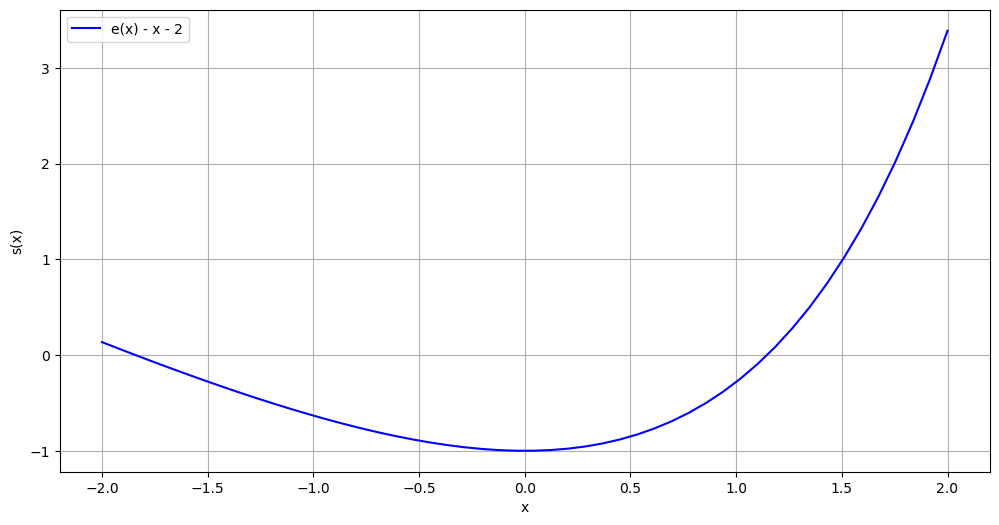

In [185]:
s = lambda x: np.exp(x) - x - 2

xs = np.linspace(-2,2)
ys = s(xs)

plt.figure(figsize=(12, 6))
plt.plot(xs, ys, color = 'blue', label = 'e(x) - x - 2')
plt.xlabel('x')
plt.ylabel('s(x)') 
plt.legend()
plt.grid(True)
plt.show()     

### Q2: Mathematical Proof: Behavior of Newton's Method for a Strictly Concave Function

See attached document "Root Finding Figures" Figure 3.

The left side will converge faster because the tangent line is closer to the curve, meaning it will intersect the x axis closer to the root. On the right side the function changes more rapidly so the tangent line is farther from the graph and intersects the x axis farther away from the root on that side. 

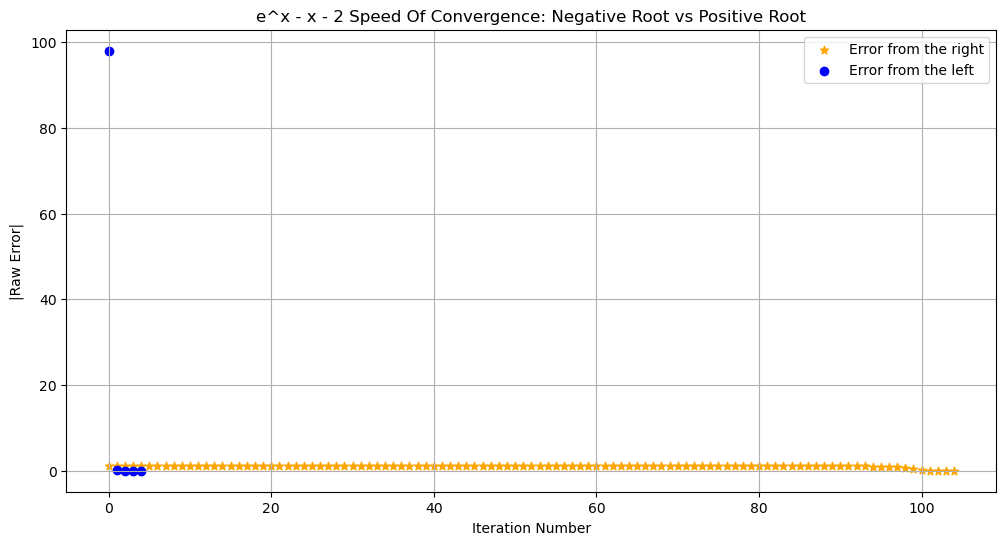

In [201]:
s = lambda x: np.exp(x) - x - 2
s_prime = lambda x: np.exp(x) - 1

x0_pos = 100
x0_neg = -100
tol_ = 1e-10
max_iTER = 1000
root_pos, err_pos, iter_pos = my_newton(s, s_prime, x0_pos, tol_, max_iTER)
root_neg, err_neg, iter_neg = my_newton(s, s_prime, x0_neg, tol_, max_iTER)

plt.figure(figsize=(12, 6))
plt.scatter(iter_pos, err_pos, color='orange', marker='*', label = 'Error from the right')
plt.scatter(iter_neg, err_neg, color='blue', marker='o', label = 'Error from the left')
plt.xlabel('Iteration Number')
plt.ylabel('|Raw Error|') 
plt.legend()
plt.title('e^x - x - 2 Speed Of Convergence: Negative Root vs Positive Root')
plt.grid(True) 
plt.show()  

The graph validates my prediction because you can see the left side (blue dots) converged to the root after only 5 iterates, while the right side (orange star) took over 100 iterates to converge on the root.  